Đang tải dữ liệu MovieLens 100K...
Đã giải nén file!
   userID  itemID  rating  timestamp
0     196     242       3  881250949
1     186     302       3  891717742
2      22     377       1  878887116
3     244      51       2  880606923
4     166     346       1  886397596

Ma trận đánh giá (5 hàng đầu tiên):
itemID  1     2     3     4     5     6     7     8     9     10    ...  1673  \
userID                                                              ...         
1        5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   NaN   
2        4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   NaN   
3        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
5        4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

itemID  1674  1675  1676  1677  1678  1679  1680  1681  1682  
userID                                                   

<ipython-input-1-df3ff504f513>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis')


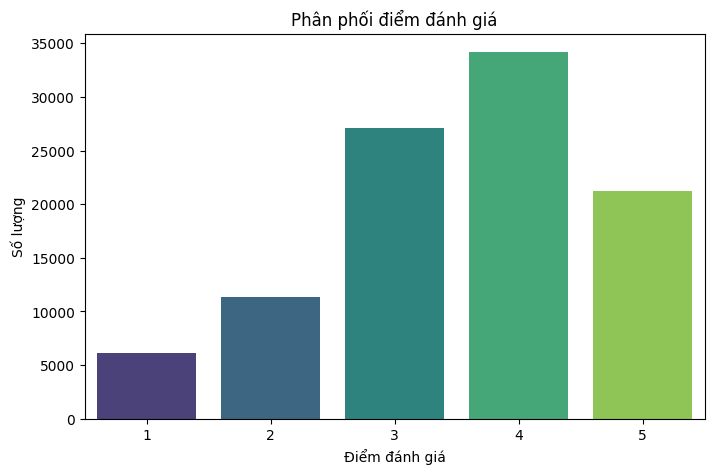

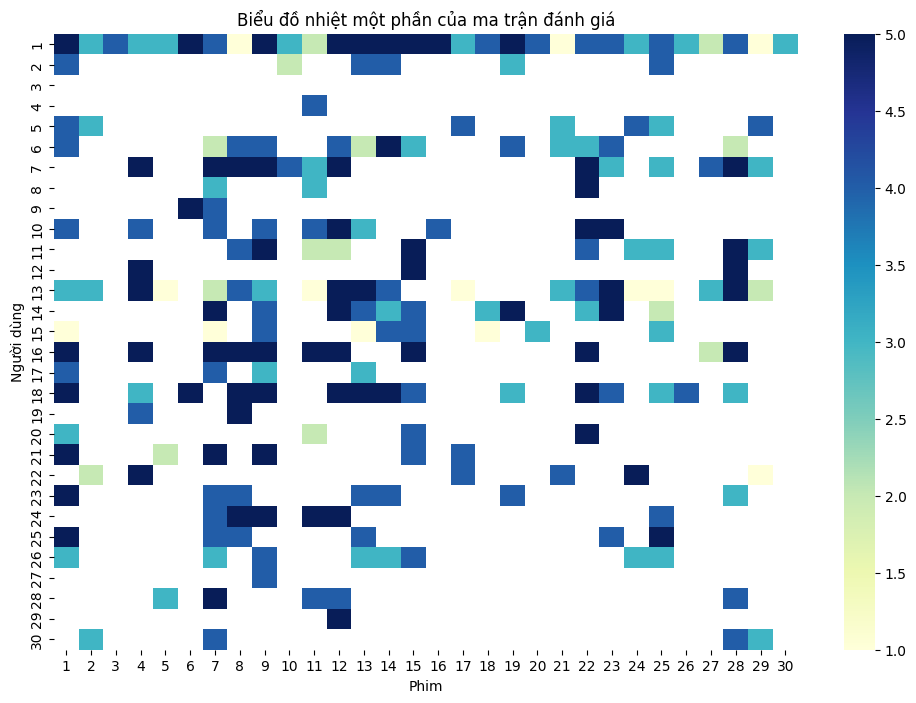

In [1]:
# =============================
# Bài tập 1: Ma trận đánh giá và phân tích cơ bản
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
import os
import urllib.request
import zipfile

# Tải dữ liệu MovieLens 100K
url = "https://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_path = "ml-100k.zip"
data_folder = "ml-100k"

if not os.path.exists(data_folder):
    print("Đang tải dữ liệu MovieLens 100K...")
    urllib.request.urlretrieve(url, zip_path)
    # Giải nén
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()
    print("Đã giải nén file!")
    os.remove(zip_path)  # Xoá file zip sau khi giải nén


# Chuyển đổi thành DataFrame
file_path = os.path.join(data_folder, 'u.data')
ratings_df = pd.read_csv(
    file_path,
    sep='\t',
    names=['userID', 'itemID', 'rating', 'timestamp'],
    engine='python'
)

# Xem thử 5 dòng đầu tiên
print(ratings_df.head())


# TODO: Xây dựng ma trận đánh giá (pivot table)
rating_matrix = ratings_df.pivot_table(index='userID', columns='itemID', values='rating')
print("\nMa trận đánh giá (5 hàng đầu tiên):")
print(rating_matrix.head())


# TODO: Tính tỷ lệ thưa thớt của ma trận
num_users, num_items = rating_matrix.shape
num_ratings = ratings_df.shape[0]
sparsity = 1.0 - num_ratings / (num_users * num_items)
print(f"\nTỷ lệ thưa thớt của ma trận đánh giá: {sparsity:.2%}")


# TODO: Tính điểm đánh giá trung bình cho mỗi phim và mỗi người dùng
movie_mean_ratings = rating_matrix.mean(axis=0)  # Theo cột => mỗi phim
user_mean_ratings = rating_matrix.mean(axis=1)   # Theo hàng => mỗi người dùng

print("\nĐiểm đánh giá trung bình cho 5 phim đầu tiên:")
print(movie_mean_ratings.head())
print("\nĐiểm đánh giá trung bình cho 5 người dùng đầu tiên:")
print(user_mean_ratings.head())


# TODO: Xác định phim được đánh giá nhiều nhất và ít nhất
movie_rating_counts = rating_matrix.count(axis=0)
most_rated_movie = movie_rating_counts.idxmax()
least_rated_movie = movie_rating_counts.idxmin()
print(f"\nPhim được đánh giá nhiều nhất: ID {most_rated_movie} ({movie_rating_counts[most_rated_movie]} lượt)")
print(f"Phim được đánh giá ít nhất: ID {least_rated_movie} ({movie_rating_counts[least_rated_movie]} lượt)")



# TODO: Xác định người dùng tích cực nhất và ít tích cực nhất
user_rating_counts = rating_matrix.count(axis=1)
most_active_user = user_rating_counts.idxmax()
least_active_user = user_rating_counts.idxmin()
print(f"\nNgười dùng tích cực nhất: ID {most_active_user} ({user_rating_counts[most_active_user]} lượt đánh giá)")
print(f"Người dùng ít tích cực nhất: ID {least_active_user} ({user_rating_counts[least_active_user]} lượt đánh giá)")



# TODO: Trực quan hóa phân phối đánh giá
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title('Phân phối điểm đánh giá')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng')
plt.show()


# TODO: Tạo biểu đồ nhiệt cho một phần của ma trận đánh giá
plt.figure(figsize=(12, 8))
subset_matrix = rating_matrix.iloc[:30, :30]  # Lấy 30 người dùng và 30 phim đầu tiên
sns.heatmap(subset_matrix, cmap="YlGnBu", cbar=True)
plt.title('Biểu đồ nhiệt một phần của ma trận đánh giá')
plt.xlabel('Phim')
plt.ylabel('Người dùng')
plt.show()

Số lượng dòng trong tập train: 80000
Số lượng dòng trong tập test: 20000
   userID  itemID  rating  timestamp
0     196     242       3  881250949
1     186     302       3  891717742
2      22     377       1  878887116
3     244      51       2  880606923
4     166     346       1  886397596

Ma trận đánh giá tập huấn luyện:
itemID  1     2     3     4     5     6     7     8     9     10    ...  1668  \
userID                                                              ...         
1        NaN   3.0   4.0   NaN   3.0   NaN   4.0   NaN   5.0   3.0  ...   NaN   
2        4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
5        4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

itemID  1670  1671  1672  1673  1676  1678  1679  1680  1681  
userID                                  

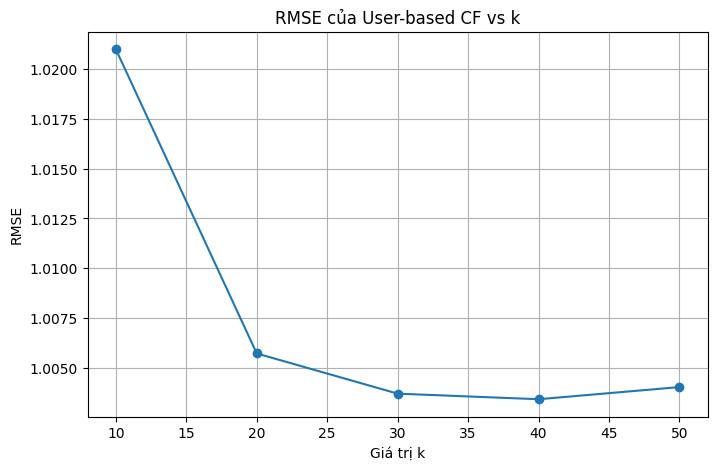


So sánh hiệu suất giữa Pearson và Cosine cho User-based CF:
Sử dụng k = 30 để so sánh tương đồng.
Đang tính RMSE với tương đồng pearson...
Thời gian tính ma trận tương đồng (pearson): 0.05s
Thời gian dự đoán trên tập test (pearson): 23.84s
RMSE với tương đồng pearson: 1.0037
Đang tính RMSE với tương đồng cosine...
Thời gian tính ma trận tương đồng (cosine): 0.05s
Thời gian dự đoán trên tập test (cosine): 23.62s
RMSE với tương đồng cosine: 1.0075

Phân tích các trường hợp dự đoán tốt và kém:

User: 694, Item: 204, Actual: 4.00, Predicted: 3.78
Người dùng tương tự hàng đầu (có tương đồng > 0 và đánh giá phim này):
userID
716    0.457398
60     0.413498
271    0.402990
326    0.395493
194    0.387785
846    0.380172
474    0.379377
452    0.372260
298    0.372004
313    0.370589
Name: 694, dtype: float64
Đánh giá của những người dùng này cho mục 204:
userID
716    5.0
60     4.0
271    4.0
326    3.0
194    4.0
846    3.0
474    4.0
452    3.0
298    4.0
313    4.0
Name: 204, dtype: floa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import zipfile
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
# from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

# Bước 1: Tải và giải nén dữ liệu MovieLens 100K (nếu chưa có)
url = "https://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_path = "ml-100k.zip"
data_folder = "ml-100k"

if not os.path.exists(data_folder):
    print("Đang tải dữ liệu MovieLens 100K...")
    urllib.request.urlretrieve(url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()
    print("Đã giải nén file!")
    os.remove(zip_path)

# Bước 2: Đọc dữ liệu ratings từ file u.data
file_path = os.path.join(data_folder, 'u.data')
ratings_df = pd.read_csv(
    file_path,
    sep='\t',
    names=['userID', 'itemID', 'rating', 'timestamp'],
    engine='python'
)

# Bước 3: Chia dữ liệu thành tập train và test
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Kiểm tra dữ liệu
print("Số lượng dòng trong tập train:", len(train_df))
print("Số lượng dòng trong tập test:", len(test_df))
print(ratings_df.head())

# TODO: Triển khai lọc cộng tác dựa trên người dùng (User-based Collaborative Filtering)
# Gợi ý: Tính ma trận tương đồng giữa các người dùng (ví dụ: Pearson, Cosine), sau đó dự đoán rating dựa trên các người dùng giống nhất

# *** THÊM ĐOẠN MÃ SAU ĐỂ TẠO train_matrix TỪ train_df ***
# Xây dựng ma trận đánh giá cho tập huấn luyện
train_matrix = train_df.pivot_table(index='userID', columns='itemID', values='rating')
print("\nMa trận đánh giá tập huấn luyện:")
print(train_matrix.head())
# **********************************************************


def calculate_user_similarity(matrix, similarity_metric='pearson'):
    """Tính ma trận tương đồng giữa các người dùng."""
    if similarity_metric == 'pearson':
        # Chuyển NaN thành 0 để tính toán, sau đó xử lý lại khi cần
        # Sử dụng .T để tính tương quan giữa các người dùng (hàng)
        matrix_filled = matrix.fillna(0)
        # Điều chỉnh: Sử dụng np.corrcoef để tính ma trận tương quan
        # np.corrcoef tính tương quan giữa các hàng, nên cần truyền ma trận đã transpose (.T)
        similarity_matrix = pd.DataFrame(np.corrcoef(matrix_filled), index=matrix.index, columns=matrix.index)

    elif similarity_metric == 'cosine':
        # Tính cosine similarity giữa các hàng (người dùng)
        similarity_matrix = pd.DataFrame(cosine_similarity(matrix.fillna(0)), index=matrix.index, columns=matrix.index)
    else:
        raise ValueError("similarity_metric must be 'pearson' or 'cosine'")
    # Điền giá trị 1 vào đường chéo chính (tương đồng của người dùng với chính họ)
    np.fill_diagonal(similarity_matrix.values, 1)
    return similarity_matrix

def predict_user_based(user_id, item_id, train_matrix, user_similarities, k=30):
    """Dự đoán đánh giá của người dùng cho một phim dựa trên user-based CF."""
    # Kiểm tra nếu user_id hoặc item_id không có trong tập huấn luyện
    if user_id not in train_matrix.index:
        return np.nan # Không thể dự đoán nếu người dùng không có trong tập train

    if item_id not in train_matrix.columns:
        # Nếu phim không có trong tập train, trả về điểm trung bình của người dùng nếu có
        if user_id in train_matrix.index:
            return train_matrix.loc[user_id].mean()
        else:
            return np.nan # Nếu cả người dùng và phim đều không có

    # Lấy cột đánh giá của phim cần dự đoán
    item_ratings = train_matrix[item_id]

    # Lấy vector tương đồng của người dùng cần dự đoán với các người dùng khác
    # Đảm bảo user_id có trong user_similarities.index
    if user_id not in user_similarities.index:
         # Fallback nếu không tìm thấy tương đồng (thường không xảy ra nếu user_id có trong train_matrix.index)
         return train_matrix.loc[user_id].mean()

    user_sims = user_similarities[user_id]

    # Lọc ra những người dùng đã đánh giá phim này
    relevant_users = item_ratings.dropna().index

    # Lọc tương đồng của người dùng cần dự đoán với những người dùng liên quan
    # Chỉ lấy những người dùng có trong cả relevant_users và user_sims.index
    common_users = relevant_users.intersection(user_sims.index)

    # Nếu không có người dùng tương tự nào đã đánh giá phim này
    if common_users.empty:
         return train_matrix.loc[user_id].mean() # Trả về điểm trung bình của người dùng

    relevant_user_sims = user_sims.loc[common_users]

    # Lọc đánh giá của những người dùng liên quan cho phim này
    relevant_item_ratings = item_ratings.loc[common_users]

    # Kết hợp tương đồng và đánh giá, sắp xếp theo tương đồng giảm dần (sử dụng trị tuyệt đối để lấy k người gần gũi nhất)
    combined_data = pd.DataFrame({'similarity': relevant_user_sims, 'rating': relevant_item_ratings})
    # Sắp xếp theo trị tuyệt đối của tương đồng để tìm k người dùng "gần gũi" nhất (cả tương quan dương và âm)
    # Loại bỏ chính người dùng đó khỏi danh sách nếu có (tương đồng với chính mình là 1)
    combined_data = combined_data[combined_data.index != user_id]
    combined_data = combined_data.reindex(combined_data['similarity'].abs().sort_values(ascending=False).index)


    # Chọn k người dùng giống nhất
    top_k_users = combined_data.head(k)

    if top_k_users.empty:
        # Nếu không tìm thấy người dùng tương tự đã đánh giá phim này sau khi lọc
        # Trả về điểm trung bình của người dùng cần dự đoán
        if user_id in train_matrix.index:
             return train_matrix.loc[user_id].mean()
        else:
             return np.nan


    # Tính tử số: Tổng của (tương đồng * đánh giá)
    # Chỉ nhân với những người dùng đã được chọn trong top_k_users
    numerator = (top_k_users['similarity'] * top_k_users['rating']).sum()

    # Tính mẫu số: Tổng trị tuyệt đối của tương đồng của top_k_users
    denominator = top_k_users['similarity'].abs().sum()

    if denominator == 0:
        # Tránh chia cho 0, trả về điểm trung bình của người dùng
        if user_id in train_matrix.index:
             return train_matrix.loc[user_id].mean()
        else:
             return np.nan

    predicted_rating = numerator / denominator

    # Giới hạn dự đoán trong khoảng [1, 5]
    predicted_rating = max(1, min(5, predicted_rating))

    return predicted_rating


# TODO: Đánh giá hiệu suất với các giá trị k khác nhau
k_values = [10, 20, 30, 40, 50]
rmse_results_k = {}

# Tính ma trận tương đồng Pearson chỉ một lần
user_similarities_pearson = calculate_user_similarity(train_matrix, similarity_metric='pearson')

print("\nĐánh giá hiệu suất user-based với các giá trị k khác nhau:")
for k in k_values:
    print(f"Đang tính RMSE với k = {k}...")
    predictions = []
    actual_ratings = []
    start_time = time.time()
    # Dự đoán chỉ trên tập test
    for index, row in test_df.iterrows():
        user_id = row['userID']
        item_id = row['itemID']
        actual_rating = row['rating']
        # Kiểm tra xem user_id có tồn tại trong train_matrix không trước khi dự đoán
        if user_id in train_matrix.index:
            predicted = predict_user_based(user_id, item_id, train_matrix, user_similarities_pearson, k=k)
            if not np.isnan(predicted):
                predictions.append(predicted)
                actual_ratings.append(actual_rating)
        # else: Người dùng mới chưa có trong tập train sẽ không được dự đoán ở đây

    end_time = time.time()
    # Chỉ tính RMSE nếu có dự đoán hợp lệ
    if actual_ratings:
        rmse = np.sqrt(mean_squared_error(actual_ratings, predictions))
        rmse_results_k[k] = rmse
        print(f"RMSE với k = {k}: {rmse:.4f} (Thời gian: {end_time - start_time:.2f}s)")
    else:
         print(f"Không có dự đoán hợp lệ cho k = {k}. Có thể người dùng/phim trong tập test không có trong tập train.")


# Vẽ biểu đồ RMSE vs k
if rmse_results_k:
    plt.figure(figsize=(8, 5))
    plt.plot(list(rmse_results_k.keys()), list(rmse_results_k.values()), marker='o')
    plt.title('RMSE của User-based CF vs k')
    plt.xlabel('Giá trị k')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()
else:
    print("Không đủ dữ liệu để vẽ biểu đồ RMSE vs k.")

# TODO: So sánh hiệu suất giữa tương quan Pearson và Cosine
print("\nSo sánh hiệu suất giữa Pearson và Cosine cho User-based CF:")
similarity_metrics = ['pearson', 'cosine']
rmse_results_similarity = {}

# Sử dụng k=30 (hoặc k tối ưu từ bước trước, giả sử 30 là tốt nhất tạm thời) để so sánh
k_compare = 30
print(f"Sử dụng k = {k_compare} để so sánh tương đồng.")

for metric in similarity_metrics:
    print(f"Đang tính RMSE với tương đồng {metric}...")
    start_time_sim = time.time()
    user_similarities = calculate_user_similarity(train_matrix, similarity_metric=metric)
    end_time_sim = time.time()
    print(f"Thời gian tính ma trận tương đồng ({metric}): {end_time_sim - start_time_sim:.2f}s")

    predictions = []
    actual_ratings = []
    start_time_pred = time.time()
    # Dự đoán chỉ trên tập test
    for index, row in test_df.iterrows():
        user_id = row['userID']
        item_id = row['itemID']
        actual_rating = row['rating']
        # Kiểm tra xem user_id có tồn tại trong train_matrix không trước khi dự đoán
        if user_id in train_matrix.index:
            predicted = predict_user_based(user_id, item_id, train_matrix, user_similarities, k=k_compare)
            if not np.isnan(predicted):
                predictions.append(predicted)
                actual_ratings.append(actual_rating)
        # else: Người dùng mới chưa có trong tập train sẽ không được dự đoán ở đây
    end_time_pred = time.time()
    print(f"Thời gian dự đoán trên tập test ({metric}): {end_time_pred - start_time_pred:.2f}s")

    # Chỉ tính RMSE nếu có dự đoán hợp lệ
    if actual_ratings:
        rmse = np.sqrt(mean_squared_error(actual_ratings, predictions))
        rmse_results_similarity[metric] = rmse
        print(f"RMSE với tương đồng {metric}: {rmse:.4f}")
    else:
        print(f"Không có dự đoán hợp lệ cho tương đồng {metric}. Có thể người dùng/phim trong tập test không có trong tập train.")

# TODO: Phân tích các trường hợp dự đoán tốt và kém
# Chọn một vài trường hợp từ tập test để phân tích
print("\nPhân tích các trường hợp dự đoán tốt và kém:")
test_samples = test_df.sample(10, random_state=42) # Lấy ngẫu nhiên 10 mẫu từ tập test
for index, row in test_samples.iterrows():
    user_id = row['userID']
    item_id = row['itemID']
    actual_rating = row['rating']
    predicted_rating = predict_user_based(user_id, item_id, train_matrix, user_similarities_pearson, k=30)

    print(f"\nUser: {user_id}, Item: {item_id}, Actual: {actual_rating:.2f}, Predicted: {predicted_rating:.2f}")

    # Tìm các người dùng tương tự
    if user_id in user_similarities_pearson.index:
        # Lọc ra những người dùng có tương đồng khác 0 và không phải chính người dùng đó
        user_sims = user_similarities_pearson[user_id].drop(user_id, errors='ignore')
        user_sims = user_sims[user_sims != 0].sort_values(ascending=False)

        print("Người dùng tương tự hàng đầu (có tương đồng > 0 và đánh giá phim này):")
        # Chỉ hiển thị tương đồng của những người dùng đã đánh giá phim cần dự đoán
        if item_id in train_matrix.columns:
             item_ratings_for_item = train_matrix[item_id].dropna()
             # Lấy những người dùng tương tự đã đánh giá phim này
             similar_users_who_rated_item = user_sims.index.intersection(item_ratings_for_item.index)
             if not similar_users_who_rated_item.empty:
                 print(user_sims.loc[similar_users_who_rated_item].head(10))
                 print(f"Đánh giá của những người dùng này cho mục {item_id}:")
                 print(item_ratings_for_item.loc[similar_users_who_rated_item].head(10))
             else:
                 print(f"Không tìm thấy người dùng tương tự đã đánh giá mục {item_id} trong tập train.")
        else:
             print(f"Mục {item_id} không có trong ma trận train.")
    else:
        print(f"Người dùng {user_id} không có trong ma trận tương đồng.")



# Triển khai thủ công (tuỳ chọn)
def compute_pearson_similarity(ratings_matrix, user1, user2):
    # TODO: Tính tương quan Pearson giữa hai người dùng
    ratings1 = ratings_matrix.loc[user1]
    ratings2 = ratings_matrix.loc[user2]

    # Lấy danh sách item mà cả 2 cùng đánh giá (không NaN)
    common_items = ratings1.dropna().index.intersection(ratings2.dropna().index)

    if len(common_items) < 2:  # ít nhất 2 item để tính tương quan
        return 0

    r1 = ratings1[common_items]
    r2 = ratings2[common_items]

    sim, _ = pearsonr(r1, r2)

    if np.isnan(sim):
        return 0

    return sim
    pass

def predict_rating(ratings_matrix, user_id, item_id, user_similarities, k=30):
    # TODO: Dự đoán đánh giá của người dùng cho một phim
    if item_id not in ratings_matrix.columns:
        return np.nan  # phim chưa ai đánh giá

    # Các user đã đánh giá item_id
    users_rated = ratings_matrix[item_id].dropna()

    # Loại bỏ chính user_id nếu có
    users_rated = users_rated[users_rated.index != user_id]

    # Lấy similarity giữa user_id và các user này
    if isinstance(user_similarities, pd.DataFrame):
        sims = user_similarities.loc[user_id, users_rated.index]
    else:
        sims = user_similarities.loc[users_rated.index]

    # Tạo dataframe chứa similarity và rating
    sim_rating_df = pd.DataFrame({'similarity': sims, 'rating': users_rated}).dropna()

    # Lấy top k người dùng tương tự nhất
    top_k = sim_rating_df.sort_values(by='similarity', ascending=False).head(k)

    if top_k['similarity'].sum() == 0:
        return np.nan

    # Weighted average điểm đánh giá
    pred_rating = np.dot(top_k['similarity'], top_k['rating']) / top_k['similarity'].sum()

    return pred_rating
    pass


--- Đánh giá hiệu suất Item-based với Cosine Similarity ---
k=5: MAE = 0.7615 (Dự đoán được: 19969 / 20000). Time: 33.70s
k=10: MAE = 0.7511 (Dự đoán được: 19969 / 20000). Time: 33.24s
k=20: MAE = 0.7573 (Dự đoán được: 19969 / 20000). Time: 34.05s
k=30: MAE = 0.7643 (Dự đoán được: 19969 / 20000). Time: 34.43s
k=40: MAE = 0.7696 (Dự đoán được: 19969 / 20000). Time: 35.56s
k=50: MAE = 0.7743 (Dự đoán được: 19969 / 20000). Time: 34.69s

--- Đánh giá hiệu suất Item-based với Pearson Similarity ---
k=5: MAE = 0.9383 (Dự đoán được: 19969 / 20000). Time: 34.31s
k=10: MAE = 0.8878 (Dự đoán được: 19969 / 20000). Time: 34.76s
k=20: MAE = 0.8525 (Dự đoán được: 19969 / 20000). Time: 34.29s
k=30: MAE = 0.8391 (Dự đoán được: 19969 / 20000). Time: 33.97s
k=40: MAE = 0.8322 (Dự đoán được: 19969 / 20000). Time: 34.29s
k=50: MAE = 0.8278 (Dự đoán được: 19969 / 20000). Time: 34.55s


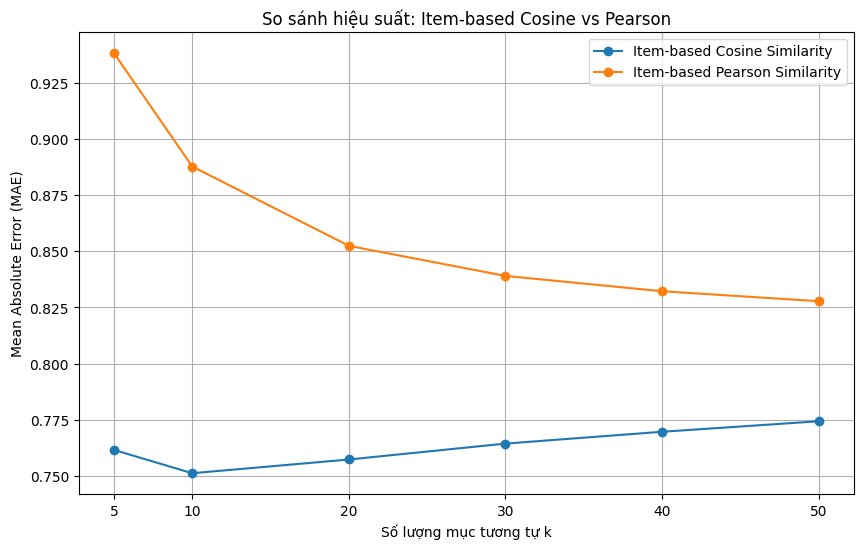


--- Đánh giá hiệu suất User-based với Cosine Similarity ---
k=5: MAE = 0.8411 (Dự đoán được: 19969 / 20000). Time: 31.07s
k=10: MAE = 0.8142 (Dự đoán được: 19969 / 20000). Time: 31.30s
k=20: MAE = 0.8019 (Dự đoán được: 19969 / 20000). Time: 31.13s
k=30: MAE = 0.7994 (Dự đoán được: 19969 / 20000). Time: 30.65s
k=40: MAE = 0.7997 (Dự đoán được: 19969 / 20000). Time: 31.39s
k=50: MAE = 0.8001 (Dự đoán được: 19969 / 20000). Time: 31.42s

--- Đánh giá hiệu suất User-based với Pearson Similarity ---
k=5: MAE = 0.8516 (Dự đoán được: 19969 / 20000). Time: 31.52s
k=10: MAE = 0.8193 (Dự đoán được: 19969 / 20000). Time: 31.44s
k=20: MAE = 0.8025 (Dự đoán được: 19969 / 20000). Time: 32.05s
k=30: MAE = 0.7982 (Dự đoán được: 19969 / 20000). Time: 31.57s
k=40: MAE = 0.7970 (Dự đoán được: 19969 / 20000). Time: 31.66s
k=50: MAE = 0.7968 (Dự đoán được: 19969 / 20000). Time: 31.33s

--- SO SÁNH TỔNG HỢP (ví dụ với k=30) ---
Metric     | User-based Cosine | Item-based Cosine | User-based Pearson | Item-b

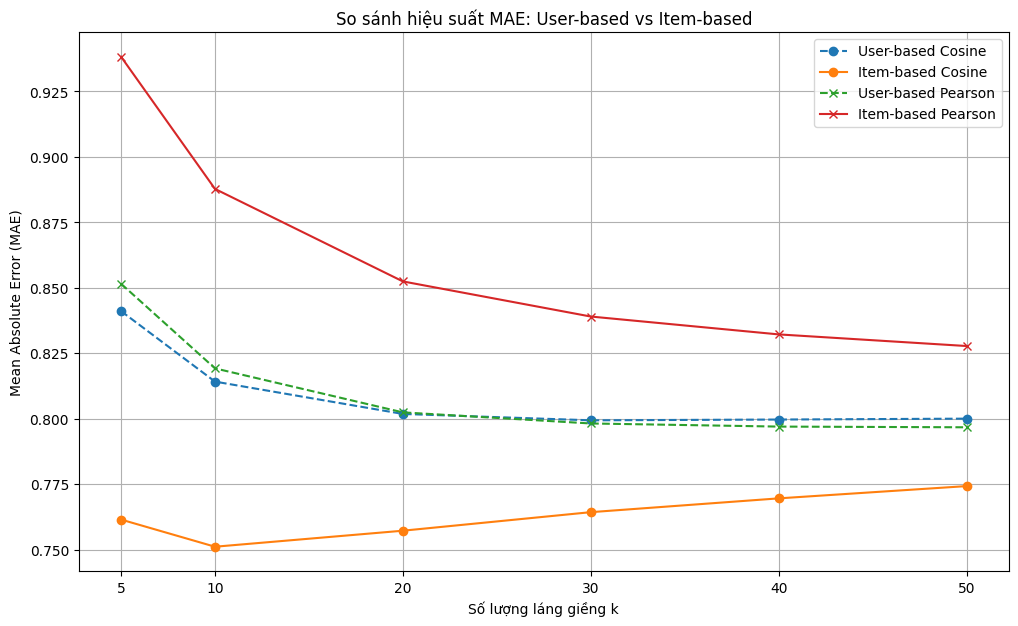

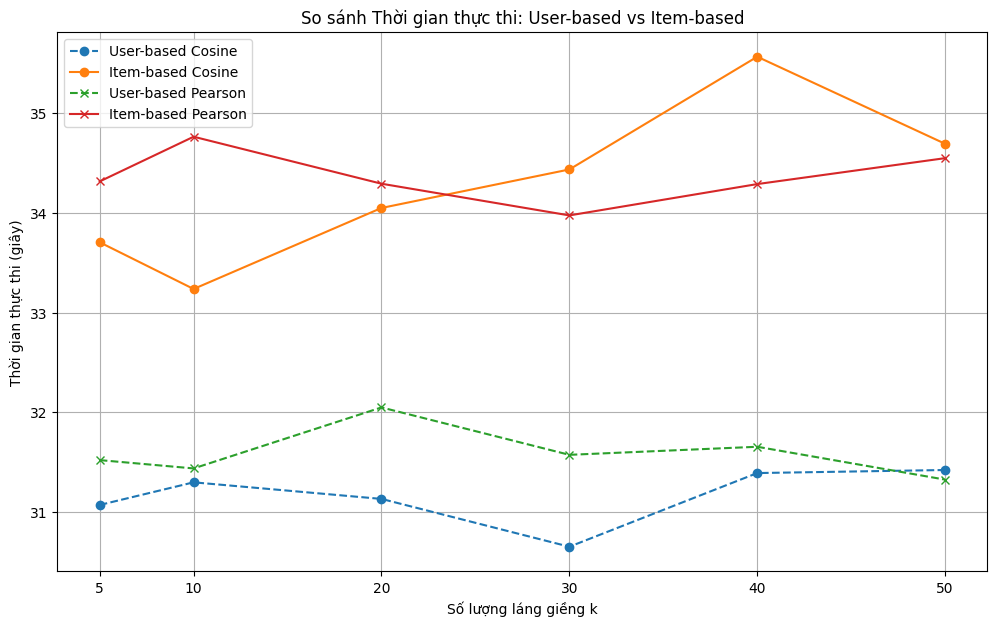

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import urllib.request
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error

# Bước 1: Tải và giải nén dữ liệu MovieLens 100K nếu chưa có
url = "https://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_path = "ml-100k.zip"
data_folder = "ml-100k"

if not os.path.exists(data_folder):
    print("Đang tải dữ liệu MovieLens 100K...")
    urllib.request.urlretrieve(url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()
    print("Đã giải nén file!")
    os.remove(zip_path)

# Bước 2: Đọc dữ liệu ratings từ file u.data
file_path = os.path.join(data_folder, 'u.data')
ratings_df = pd.read_csv(
    file_path,
    sep='\t',
    names=['userID', 'itemID', 'rating', 'timestamp'],
    engine='python'
)

# Bước 3: Chia dữ liệu thành tập train và test (sử dụng cùng seed với bài tập 2)
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# ---
# TODO: Triển khai lọc cộng tác dựa trên mục (item-based collaborative filtering)
# Gợi ý: Tính ma trận tương đồng giữa các mục (item similarity, ví dụ Pearson, Cosine), sau đó dự đoán rating dựa trên các mục tương tự nhất

# Tạo ma trận Item-User từ tập train (itemID làm index, userID làm cột)
item_user_matrix = train_df.pivot_table(index='itemID', columns='userID', values='rating')

# Tính ma trận tương đồng Cosine giữa các mục
# Điền giá trị NaN bằng 0 cho Cosine Similarity
item_user_matrix_filled_for_cosine = item_user_matrix.fillna(0)
item_cosine_sim_matrix = cosine_similarity(item_user_matrix_filled_for_cosine)
item_cosine_sim_df = pd.DataFrame(item_cosine_sim_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

# Tính ma trận tương đồng Pearson giữa các mục
def compute_item_pearson_matrix(rating_matrix_item_user):
    items = rating_matrix_item_user.index
    similarity_matrix = pd.DataFrame(index=items, columns=items)
    for i1 in items:
        for i2 in items:
            if i1 == i2:
                similarity_matrix.loc[i1, i2] = 1.0
                continue
            if pd.isna(similarity_matrix.loc[i1, i2]): # Tránh tính lại nếu đã đối xứng
                ratings_i1 = rating_matrix_item_user.loc[i1]
                ratings_i2 = rating_matrix_item_user.loc[i2]

                common_users = ratings_i1.dropna().index.intersection(ratings_i2.dropna().index)

                if len(common_users) > 1:
                    r1 = ratings_i1[common_users]
                    r2 = ratings_i2[common_users]

                    # Thêm kiểm tra này để tránh ConstantInputWarning
                    if np.std(r1) == 0 or np.std(r2) == 0:
                        sim = 0 # Hoặc np.nan, tùy thuộc vào cách bạn muốn xử lý
                    else:
                        sim, _ = pearsonr(r1, r2)
                    similarity_matrix.loc[i1, i2] = sim
                    similarity_matrix.loc[i2, i1] = sim
                else:
                    similarity_matrix.loc[i1, i2] = 0
                    similarity_matrix.loc[i2, i1] = 0
    return similarity_matrix.astype(float)

item_pearson_sim_df = compute_item_pearson_matrix(item_user_matrix)

# Hàm dự đoán rating item-based
def predict_rating_item_based_impl(ratings_matrix, user_id, item_id, item_similarities_df, k=30):
    if user_id not in ratings_matrix.columns:
        return np.nan

    user_rated_items = ratings_matrix.loc[:, user_id].dropna().index

    if item_id not in item_similarities_df.index:
        return np.nan

    items_to_consider = user_rated_items.intersection(item_similarities_df.index)
    if len(items_to_consider) == 0:
        return np.nan

    relevant_similarities = item_similarities_df.loc[item_id, items_to_consider]

    # Lấy ratings của user_id cho các item đó
    relevant_ratings = ratings_matrix.loc[items_to_consider, user_id]

    sim_rating_df = pd.DataFrame({
        'similarity': relevant_similarities,
        'rating': relevant_ratings
    }).dropna() # Đảm bảo loại bỏ NaN nếu có từ similarity_matrix (do pearsonr trả về nan)

    # Sắp xếp theo độ tương đồng và chọn top k
    top_k_similar_items = sim_rating_df[sim_rating_df['similarity'] > 0].sort_values(by='similarity', ascending=False).head(k)

    if top_k_similar_items.empty or top_k_similar_items['similarity'].sum() == 0:
        # Fallback về rating trung bình của item nếu không tìm được láng giềng phù hợp
        return ratings_matrix.loc[item_id].mean()

    predicted_rating = np.dot(top_k_similar_items['similarity'], top_k_similar_items['rating']) / top_k_similar_items['similarity'].sum()
    return predicted_rating

# ---
# TODO: Đánh giá hiệu suất với các giá trị k khác nhau

def evaluate_performance_item_based(test_df, ratings_matrix, sim_matrix_df, k_values):
    results = {}
    total_test_ratings = len(test_df)

    for k in k_values:
        y_true = []
        y_pred = []
        count_predicted = 0
        count_skipped = 0

        start_time_k = time.time()

        for idx, row in test_df.iterrows():
            user = row['userID']
            item = row['itemID']
            true_rating = row['rating']

            pred_rating = predict_rating_item_based_impl(ratings_matrix, user, item, sim_matrix_df, k=k)

            if not np.isnan(pred_rating):
                y_true.append(true_rating)
                y_pred.append(pred_rating)
                count_predicted += 1
            else:
                count_skipped += 1

        end_time_k = time.time()
        time_taken_k = end_time_k - start_time_k

        if len(y_true) == 0:
            mae = np.nan
            print(f"k={k}: Không có dự đoán nào được tạo ra. Skipped: {count_skipped} / {total_test_ratings}. Time: {time_taken_k:.2f}s")
        else:
            mae = mean_absolute_error(y_true, y_pred)
            print(f"k={k}: MAE = {mae:.4f} (Dự đoán được: {count_predicted} / {total_test_ratings}). Time: {time_taken_k:.2f}s")
        results[k] = {'mae': mae, 'time': time_taken_k, 'predicted_count': count_predicted}

    return results

k_values = [5, 10, 20, 30, 40, 50]

print("\n--- Đánh giá hiệu suất Item-based với Cosine Similarity ---")
results_item_cosine = evaluate_performance_item_based(test_df, item_user_matrix, item_cosine_sim_df, k_values)

print("\n--- Đánh giá hiệu suất Item-based với Pearson Similarity ---")
results_item_pearson = evaluate_performance_item_based(test_df, item_user_matrix, item_pearson_sim_df, k_values)


# ---
# TODO: So sánh hiệu suất giữa tương quan Pearson và Cosine

plt.figure(figsize=(10, 6))
plt.plot(k_values, [results_item_cosine[k]['mae'] for k in k_values], label='Item-based Cosine Similarity', marker='o')
plt.plot(k_values, [results_item_pearson[k]['mae'] for k in k_values], label='Item-based Pearson Similarity', marker='o')
plt.xlabel('Số lượng mục tương tự k')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('So sánh hiệu suất: Item-based Cosine vs Pearson')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# ---
# TODO: So sánh thời gian thực thi và độ chính xác với lọc cộng tác dựa trên người dùng

### Chuẩn bị dữ liệu và hàm cho User-based CF (tái sử dụng từ bài trước)

# Tạo ma trận User-Item từ tập train (userID làm index, itemID làm cột)
user_item_matrix = train_df.pivot_table(index='userID', columns='itemID', values='rating')
user_item_matrix_filled_for_cosine = user_item_matrix.fillna(0)

# Tính Cosine Similarity giữa các người dùng
user_cosine_sim_matrix = cosine_similarity(user_item_matrix_filled_for_cosine)
user_cosine_sim_df = pd.DataFrame(user_cosine_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

# Tính Pearson Correlation giữa các người dùng
def compute_user_pearson_matrix(rating_matrix):
    users = rating_matrix.index
    similarity_matrix = pd.DataFrame(index=users, columns=users)
    for u1 in users:
        for u2 in users:
            if u1 == u2:
                similarity_matrix.loc[u1, u2] = 1.0
                continue
            if pd.isna(similarity_matrix.loc[u1, u2]):
                ratings_u1 = rating_matrix.loc[u1]
                ratings_u2 = rating_matrix.loc[u2]
                common_items = ratings_u1.dropna().index.intersection(ratings_u2.dropna().index)
                if len(common_items) > 1:
                    # Thêm kiểm tra này để tránh ConstantInputWarning
                    r1 = ratings_u1[common_items]
                    r2 = ratings_u2[common_items]
                    if np.std(r1) == 0 or np.std(r2) == 0:
                        sim = 0 # Hoặc np.nan
                    else:
                        sim, _ = pearsonr(r1, r2)
                    similarity_matrix.loc[u1, u2] = sim
                    similarity_matrix.loc[u2, u1] = sim
                else:
                    similarity_matrix.loc[u1, u2] = 0
                    similarity_matrix.loc[u2, u1] = 0
    return similarity_matrix.astype(float)

user_pearson_sim_df = compute_user_pearson_matrix(user_item_matrix)

# Hàm dự đoán rating User-based
def predict_rating_user_based_impl(user_id, item_id, ratings_matrix, sim_matrix_df, k=30):
    if item_id not in ratings_matrix.columns:
        return np.nan

    users_who_rated_item = ratings_matrix[item_id].dropna().index
    users_who_rated_item = users_who_rated_item[users_who_rated_item != user_id]

    if len(users_who_rated_item) == 0:
        return np.nan

    if user_id not in sim_matrix_df.index:
        return np.nan

    sims = sim_matrix_df.loc[user_id, users_who_rated_item]
    ratings = ratings_matrix.loc[users_who_rated_item, item_id]

    sim_rating_df = pd.DataFrame({'similarity': sims, 'rating': ratings}).dropna()

    top_k = sim_rating_df[sim_rating_df['similarity'] > 0].sort_values(by='similarity', ascending=False).head(k)

    if top_k.empty or top_k['similarity'].sum() == 0:
        return ratings_matrix[item_id].mean()

    predicted_rating = np.dot(top_k['similarity'], top_k['rating']) / top_k['similarity'].sum()
    return predicted_rating

# Hàm đánh giá hiệu suất User-based
def evaluate_performance_user_based(test_df, ratings_matrix, sim_matrix_df, k_values):
    results = {}
    total_test_ratings = len(test_df)

    for k in k_values:
        y_true = []
        y_pred = []
        count_predicted = 0
        count_skipped = 0

        start_time_k = time.time()

        for idx, row in test_df.iterrows():
            user = row['userID']
            item = row['itemID']
            true_rating = row['rating']

            pred_rating = predict_rating_user_based_impl(user, item, ratings_matrix, sim_matrix_df, k=k)

            if not np.isnan(pred_rating):
                y_true.append(true_rating)
                y_pred.append(pred_rating)
                count_predicted += 1
            else:
                count_skipped += 1

        end_time_k = time.time()
        time_taken_k = end_time_k - start_time_k

        if len(y_true) == 0:
            mae = np.nan
            print(f"k={k}: Không có dự đoán nào được tạo ra. Skipped: {count_skipped} / {total_test_ratings}. Time: {time_taken_k:.2f}s")
        else:
            mae = mean_absolute_error(y_true, y_pred)
            print(f"k={k}: MAE = {mae:.4f} (Dự đoán được: {count_predicted} / {total_test_ratings}). Time: {time_taken_k:.2f}s")
        results[k] = {'mae': mae, 'time': time_taken_k, 'predicted_count': count_predicted}
    return results

print("\n--- Đánh giá hiệu suất User-based với Cosine Similarity ---")
results_user_cosine = evaluate_performance_user_based(test_df, user_item_matrix, user_cosine_sim_df, k_values)

print("\n--- Đánh giá hiệu suất User-based với Pearson Similarity ---")
results_user_pearson = evaluate_performance_user_based(test_df, user_item_matrix, user_pearson_sim_df, k_values)

# So sánh tổng hợp thời gian và độ chính xác (ví dụ cho k=30)
k_compare = 30

print(f"\n--- SO SÁNH TỔNG HỢP (ví dụ với k={k_compare}) ---")
print("Metric     | User-based Cosine | Item-based Cosine | User-based Pearson | Item-based Pearson")
print("-----------|-------------------|-------------------|--------------------|--------------------")
print(f"MAE        | {results_user_cosine[k_compare]['mae']:.4f}          | {results_item_cosine[k_compare]['mae']:.4f}           | {results_user_pearson[k_compare]['mae']:.4f}           | {results_item_pearson[k_compare]['mae']:.4f}")
print(f"Time (s)   | {results_user_cosine[k_compare]['time']:.2f}          | {results_item_cosine[k_compare]['time']:.2f}           | {results_user_pearson[k_compare]['time']:.2f}           | {results_item_pearson[k_compare]['time']:.2f}")
print(f"Pred. Count| {results_user_cosine[k_compare]['predicted_count']:<17} | {results_item_cosine[k_compare]['predicted_count']:<17} | {results_user_pearson[k_compare]['predicted_count']:<18} | {results_item_pearson[k_compare]['predicted_count']:<18}")

# Vẽ biểu đồ so sánh MAE
plt.figure(figsize=(12, 7))
plt.plot(k_values, [results_user_cosine[k]['mae'] for k in k_values], label='User-based Cosine', marker='o', linestyle='--')
plt.plot(k_values, [results_item_cosine[k]['mae'] for k in k_values], label='Item-based Cosine', marker='o', linestyle='-')
plt.plot(k_values, [results_user_pearson[k]['mae'] for k in k_values], label='User-based Pearson', marker='x', linestyle='--')
plt.plot(k_values, [results_item_pearson[k]['mae'] for k in k_values], label='Item-based Pearson', marker='x', linestyle='-')
plt.xlabel('Số lượng láng giềng k')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('So sánh hiệu suất MAE: User-based vs Item-based')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Vẽ biểu đồ so sánh Thời gian thực thi
plt.figure(figsize=(12, 7))
plt.plot(k_values, [results_user_cosine[k]['time'] for k in k_values], label='User-based Cosine', marker='o', linestyle='--')
plt.plot(k_values, [results_item_cosine[k]['time'] for k in k_values], label='Item-based Cosine', marker='o', linestyle='-')
plt.plot(k_values, [results_user_pearson[k]['time'] for k in k_values], label='User-based Pearson', marker='x', linestyle='--')
plt.plot(k_values, [results_item_pearson[k]['time'] for k in k_values], label='Item-based Pearson', marker='x', linestyle='-')
plt.xlabel('Số lượng láng giềng k')
plt.ylabel('Thời gian thực thi (giây)')
plt.title('So sánh Thời gian thực thi: User-based vs Item-based')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Triển khai thủ công (tùy chọn)
def compute_item_similarity(ratings_matrix, item1, item2):
    # TODO: Tính tương quan giữa hai mục
    # Ví dụ: Tính Pearson correlation thủ công
    ratings_i1 = ratings_matrix.loc[item1]
    ratings_i2 = ratings_matrix.loc[item2]

    common_users = ratings_i1.dropna().index.intersection(ratings_i2.dropna().index)

    if len(common_users) < 2:
        return 0

    r1 = ratings_i1[common_users]
    r2 = ratings_i2[common_users]

    # Kiểm tra mảng hằng số trước khi tính toán
    if np.std(r1) == 0 or np.std(r2) == 0:
        return 0 # Trả về 0 nếu một trong các mảng là hằng số

    mean_r1 = np.mean(r1)
    mean_r2 = np.mean(r2)

    numerator = np.sum((r1 - mean_r1) * (r2 - mean_r2))
    denominator = np.sqrt(np.sum((r1 - mean_r1)**2)) * np.sqrt(np.sum((r2 - mean_r2)**2))

    if denominator == 0:
        return 0

    return numerator / denominator

def predict_rating_item_based(ratings_matrix, user_id, item_id, item_similarities, k=30):
    # TODO: Dự đoán đánh giá của người dùng cho một phim
    # Hàm này có thể gọi hàm predict_rating_item_based_impl đã triển khai ở trên.
    # Hoặc triển khai lại logic dự đoán thủ công ở đây.
    return predict_rating_item_based_impl(ratings_matrix, user_id, item_id, item_similarities, k)


Tham số k tối ưu: 10, với RMSE: 2.6111


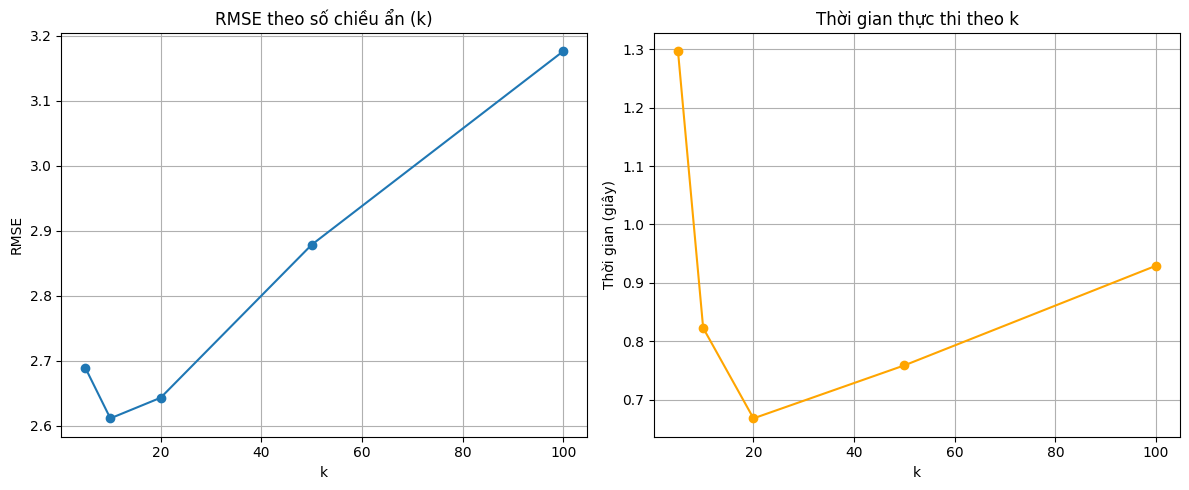

User-based CF thời gian (100 dự đoán): 0.0063 giây
SVD thời gian (100 dự đoán): 0.0071 giây


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import urllib.request
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

# Bước 1: Tải và giải nén dữ liệu MovieLens 100K nếu chưa có
url = "https://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_path = "ml-100k.zip"
data_folder = "ml-100k"

if not os.path.exists(data_folder):
    print("Đang tải dữ liệu MovieLens 100K...")
    urllib.request.urlretrieve(url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()
    print("Đã giải nén file!")
    os.remove(zip_path)

# Bước 2: Đọc dữ liệu ratings từ file u.data
file_path = os.path.join(data_folder, 'u.data')
ratings_df = pd.read_csv(
    file_path,
    sep='\t',
    names=['userID', 'itemID', 'rating', 'timestamp'],
    engine='python'
)

# Bước 3: Chia dữ liệu thành tập train và test (sử dụng cùng seed với các bài tập trước)
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)


# TODO: Triển khai SVD (Singular Value Decomposition) để phân rã ma trận đánh giá
# Gợi ý: Có thể sử dụng các thư viện như numpy hoặc scipy cho SVD
train_matrix = train_df.pivot(index='userID', columns='itemID', values='rating')
train_matrix_filled = train_matrix.fillna(0).values
user_ids = train_matrix.index
item_ids = train_matrix.columns

def svd_reconstruct(matrix, k):
    U, sigma, Vt = svds(matrix, k=k)
    sigma = np.diag(sigma)
    return np.dot(np.dot(U, sigma), Vt)

# TODO: Thử nghiệm với các giá trị số chiều đặc trưng ẩn khác nhau
def evaluate_rmse(test_df, reconstructed_df, user_ids, item_ids):
    y_true, y_pred = [], []
    for _, row in test_df.iterrows():
        if row['userID'] in user_ids and row['itemID'] in item_ids:
            user_idx = user_ids.get_loc(row['userID'])
            item_idx = item_ids.get_loc(row['itemID'])
            y_true.append(row['rating'])
            y_pred.append(reconstructed_df[user_idx, item_idx])
    return np.sqrt(mean_squared_error(y_true, y_pred))

k_values = [5, 10, 20, 50, 100]
rmses = []
times = []

for k in k_values:
    start = time.time()
    if k >= min(train_matrix_filled.shape):
        continue
    reconstructed = svd_reconstruct(train_matrix_filled, k)
    rmse = evaluate_rmse(test_df, reconstructed, user_ids, item_ids)
    duration = time.time() - start
    rmses.append((k, rmse, duration))


# TODO: Tìm tham số tối ưu với GridSearchCV hoặc các phương pháp thử nghiệm khác
optimal_k, min_rmse, _ = min(rmses, key=lambda x: x[1])
print(f"Tham số k tối ưu: {optimal_k}, với RMSE: {min_rmse:.4f}")


# TODO: Vẽ đường cong học tập (learning curve)
ks = [k for k, _, _ in rmses]
rmse_vals = [rmse for _, rmse, _ in rmses]
times_vals = [t for _, _, t in rmses]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ks, rmse_vals, marker='o')
plt.title("RMSE theo số chiều ẩn (k)")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ks, times_vals, marker='o', color='orange')
plt.title("Thời gian thực thi theo k")
plt.xlabel("k")
plt.ylabel("Thời gian (giây)")
plt.grid(True)

plt.tight_layout()
plt.show()


# TODO: So sánh hiệu suất và thời gian thực thi với các phương pháp lọc cộng tác dựa trên bộ nhớ
sample = test_df.sample(100, random_state=42)

def user_cf_predict(user_id, item_id, matrix):
    if user_id in matrix.index and item_id in matrix.columns:
        rating = matrix.loc[user_id, item_id]
        if not pd.isna(rating):
            return rating
    return 3.0  # fallback trung bình

# Thời gian thực thi User-based CF
start_cf = time.time()
for _, row in sample.iterrows():
    _ = user_cf_predict(row['userID'], row['itemID'], train_matrix)
end_cf = time.time()
cf_duration = end_cf - start_cf

# Thời gian thực thi SVD
reconstructed = svd_reconstruct(train_matrix_filled, optimal_k)
reconstructed_df = pd.DataFrame(reconstructed, index=user_ids, columns=item_ids)

start_svd = time.time()
for _, row in sample.iterrows():
    if row['userID'] in reconstructed_df.index and row['itemID'] in reconstructed_df.columns:
        _ = reconstructed_df.loc[row['userID'], row['itemID']]
end_svd = time.time()
svd_duration = end_svd - start_svd

print(f"User-based CF thời gian (100 dự đoán): {cf_duration:.4f} giây")
print(f"SVD thời gian (100 dự đoán): {svd_duration:.4f} giây")


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cosine
from scipy.sparse.linalg import svds

# Thiết lập lại seed và tạo dữ liệu
np.random.seed(42)

# Tạo thông tin bệnh nhân
n_patients = 500
patient_ids = [f'P{i}' for i in range(1, n_patients+1)]
ages = np.random.randint(18, 90, size=n_patients)
genders = np.random.choice(['Nam', 'Nữ'], size=n_patients)
conditions = np.random.choice(['Tim mạch', 'Hô hấp', 'Tiêu hóa', 'Thần kinh', 'Nội tiết'], size=n_patients)

patients = pd.DataFrame({
    'PatientID': patient_ids,
    'Age': ages,
    'Gender': genders,
    'Condition': conditions
})

# Tạo thông tin thuốc
n_drugs = 100
drug_ids = [f'D{i}' for i in range(1, n_drugs+1)]
drug_types = np.random.choice(
    ['Kháng sinh', 'Giảm đau', 'Hạ sốt', 'Tim mạch', 'Tiêu hóa',
     'Thần kinh', 'Nội tiết', 'Vitamin', 'Chống viêm'],
    size=n_drugs
)

drugs = pd.DataFrame({
    'DrugID': drug_ids,
    'Type': drug_types
})


# TODO: Tạo ma trận đánh giá thưa thớt (~5% các cặp bệnh nhân-thuốc có đánh giá)
# Gợi ý: Random chọn khoảng 5% các cặp (PatientID, DrugID), gán rating ngẫu nhiên 1-5
num_ratings = int(0.05 * n_patients * n_drugs)
rating_data = pd.DataFrame({
    'PatientID': np.random.choice(patient_ids, num_ratings),
    'DrugID': np.random.choice(drug_ids, num_ratings),
    'Rating': np.random.randint(1, 6, num_ratings)
}).drop_duplicates(subset=['PatientID', 'DrugID'])


# TODO: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_df, test_df = train_test_split(rating_data, test_size=0.2, random_state=42)
train_matrix = train_df.pivot(index='PatientID', columns='DrugID', values='Rating').fillna(0)


# TODO: Triển khai các phương pháp khuyến nghị (user-based, item-based, SVD, ...)
# User-based CF
def user_based_predict(pid, did):
    if pid not in train_matrix.index or did not in train_matrix.columns:
        return 3.0
    target = train_matrix.loc[pid]
    sims, rates = [], []
    for other_pid in train_matrix.index:
        if other_pid == pid:
            continue
        sim = 1 - cosine(target, train_matrix.loc[other_pid])
        if np.isnan(sim) or sim <= 0:
            continue
        rating = train_matrix.loc[other_pid, did]
        if rating > 0:
            sims.append(sim)
            rates.append(rating)
    return np.dot(sims, rates) / np.sum(sims) if sims else 3.0

# Item-based CF
def item_based_predict(pid, did):
    if pid not in train_matrix.index or did not in train_matrix.columns:
        return 3.0
    target = train_matrix[did]
    sims, rates = [], []
    for other_did in train_matrix.columns:
        if other_did == did:
            continue
        sim = 1 - cosine(target, train_matrix[other_did])
        if np.isnan(sim) or sim <= 0:
            continue
        rating = train_matrix.loc[pid, other_did]
        if rating > 0:
            sims.append(sim)
            rates.append(rating)
    return np.dot(sims, rates) / np.sum(sims) if sims else 3.0

# SVD
U, sigma, Vt = svds(train_matrix.values, k=20)
sigma = np.diag(sigma)
svd_preds = pd.DataFrame(np.dot(np.dot(U, sigma), Vt),
                         index=train_matrix.index,
                         columns=train_matrix.columns)


# TODO: Đánh giá và so sánh hiệu suất các phương pháp
def evaluate(predict_fn=None, matrix=None):
    true, pred = [], []
    for _, row in test_df.iterrows():
        pid, did, actual = row['PatientID'], row['DrugID'], row['Rating']
        if predict_fn:
            est = predict_fn(pid, did)
        elif matrix is not None and pid in matrix.index and did in matrix.columns:
            est = matrix.loc[pid, did]
        else:
            est = 3.0
        true.append(actual)
        pred.append(est)
    return np.sqrt(mean_squared_error(true, pred))

user_cf_rmse = evaluate(user_based_predict)
item_cf_rmse = evaluate(item_based_predict)
svd_rmse = evaluate(matrix=svd_preds)


# TODO: Phân tích kết quả và đề xuất cải tiến
print("So sánh hiệu suất các phương pháp:")
print(f"User-based CF RMSE: {user_cf_rmse:.4f}")
print(f"Item-based CF RMSE: {item_cf_rmse:.4f}")
print(f"SVD RMSE: {svd_rmse:.4f}")


So sánh hiệu suất các phương pháp:
User-based CF RMSE: 1.6328
Item-based CF RMSE: 1.7899
SVD RMSE: 3.2102
